# Comparison of precipitation from evaporation versus scaling from desalination

## Evaporation

Effluent module 1 CF: 1.1176963344974205

--> The ['Zn', 'Ni', 'Cu', 'Cd', 'Co', 'Pb'] elements are not accepted by the pitzer database

Estimated completion in 7 seconds: 2022-11-24 15:11:32.505962 local time.
run_time (s): 1.2246940000000004


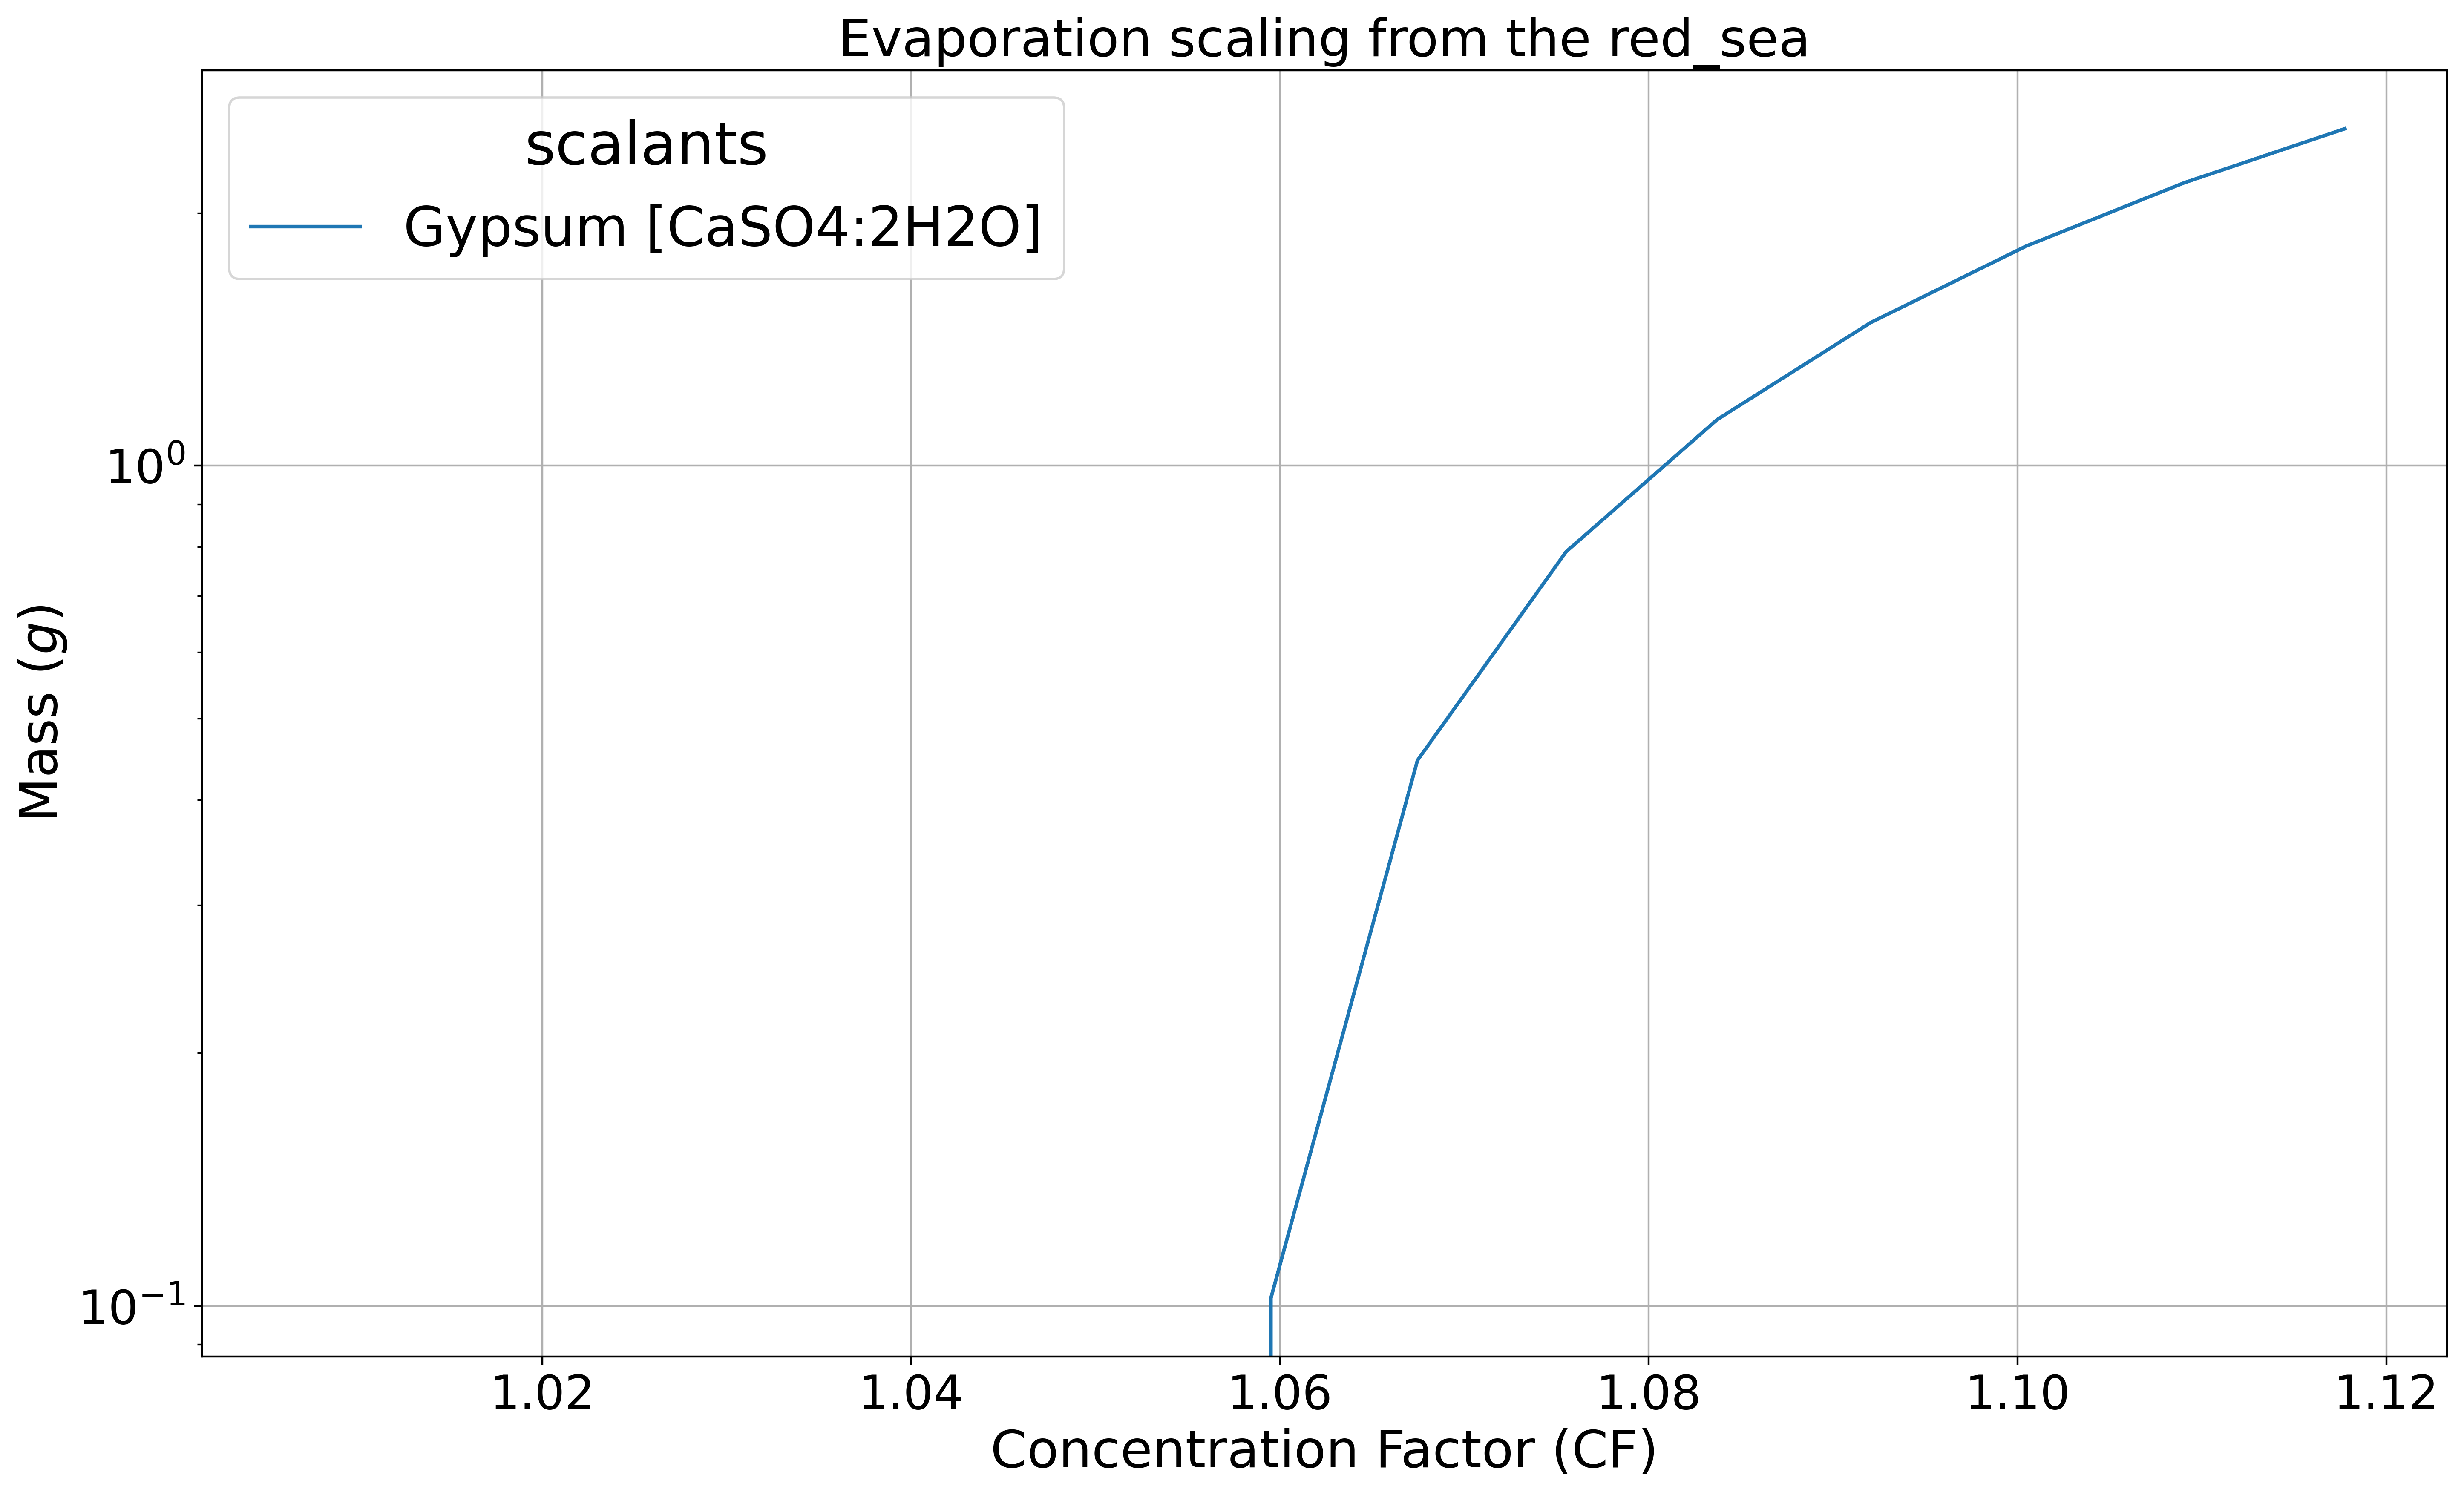

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ionic masses
OrderedDict([('1.00707 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.01424 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.02151 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.02889 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.03638 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.04398 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.05168 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('1.05951 (m)',
              {'ion (g/m^2)': {'Ca': 0.02655520077739625,
                               'H': 0.0013356978427850079,
                               'O': 0.053005050067103335,
                               'S': 0.02124588335064650

In [1]:
%run ../../../../rosspy/ro.py
# import rosspy

# initial parameters
database_selection = 'pitzer'
water_selection = 'red_sea'
simulation_type = 'evaporation'
simulation_time = 200
export_name = 'evaporation'

# create the input file
ross = ROSSPkg(database_selection, simulation_type = simulation_type, export_content = True, jupyter = True)
ross.reactive_transport(simulation_time)
ross.feed_geochemistry(water_selection)
ross.execute(export_name, export_format="eps")

evaporation_data = ross.processed_data

## Desalination

Effluent module 1 CF: 1.1176963344974205

--> The ['Zn', 'Ni', 'Cu', 'Cd', 'Co', 'Pb'] elements are not accepted by the pitzer database

Estimated completion in 7 seconds: 2022-11-24 15:11:35.674674 local time.
run_time (s): 8.0681441
Gypsum		{'formula': 'CaSO4:2H2O', 'mass': '170'}


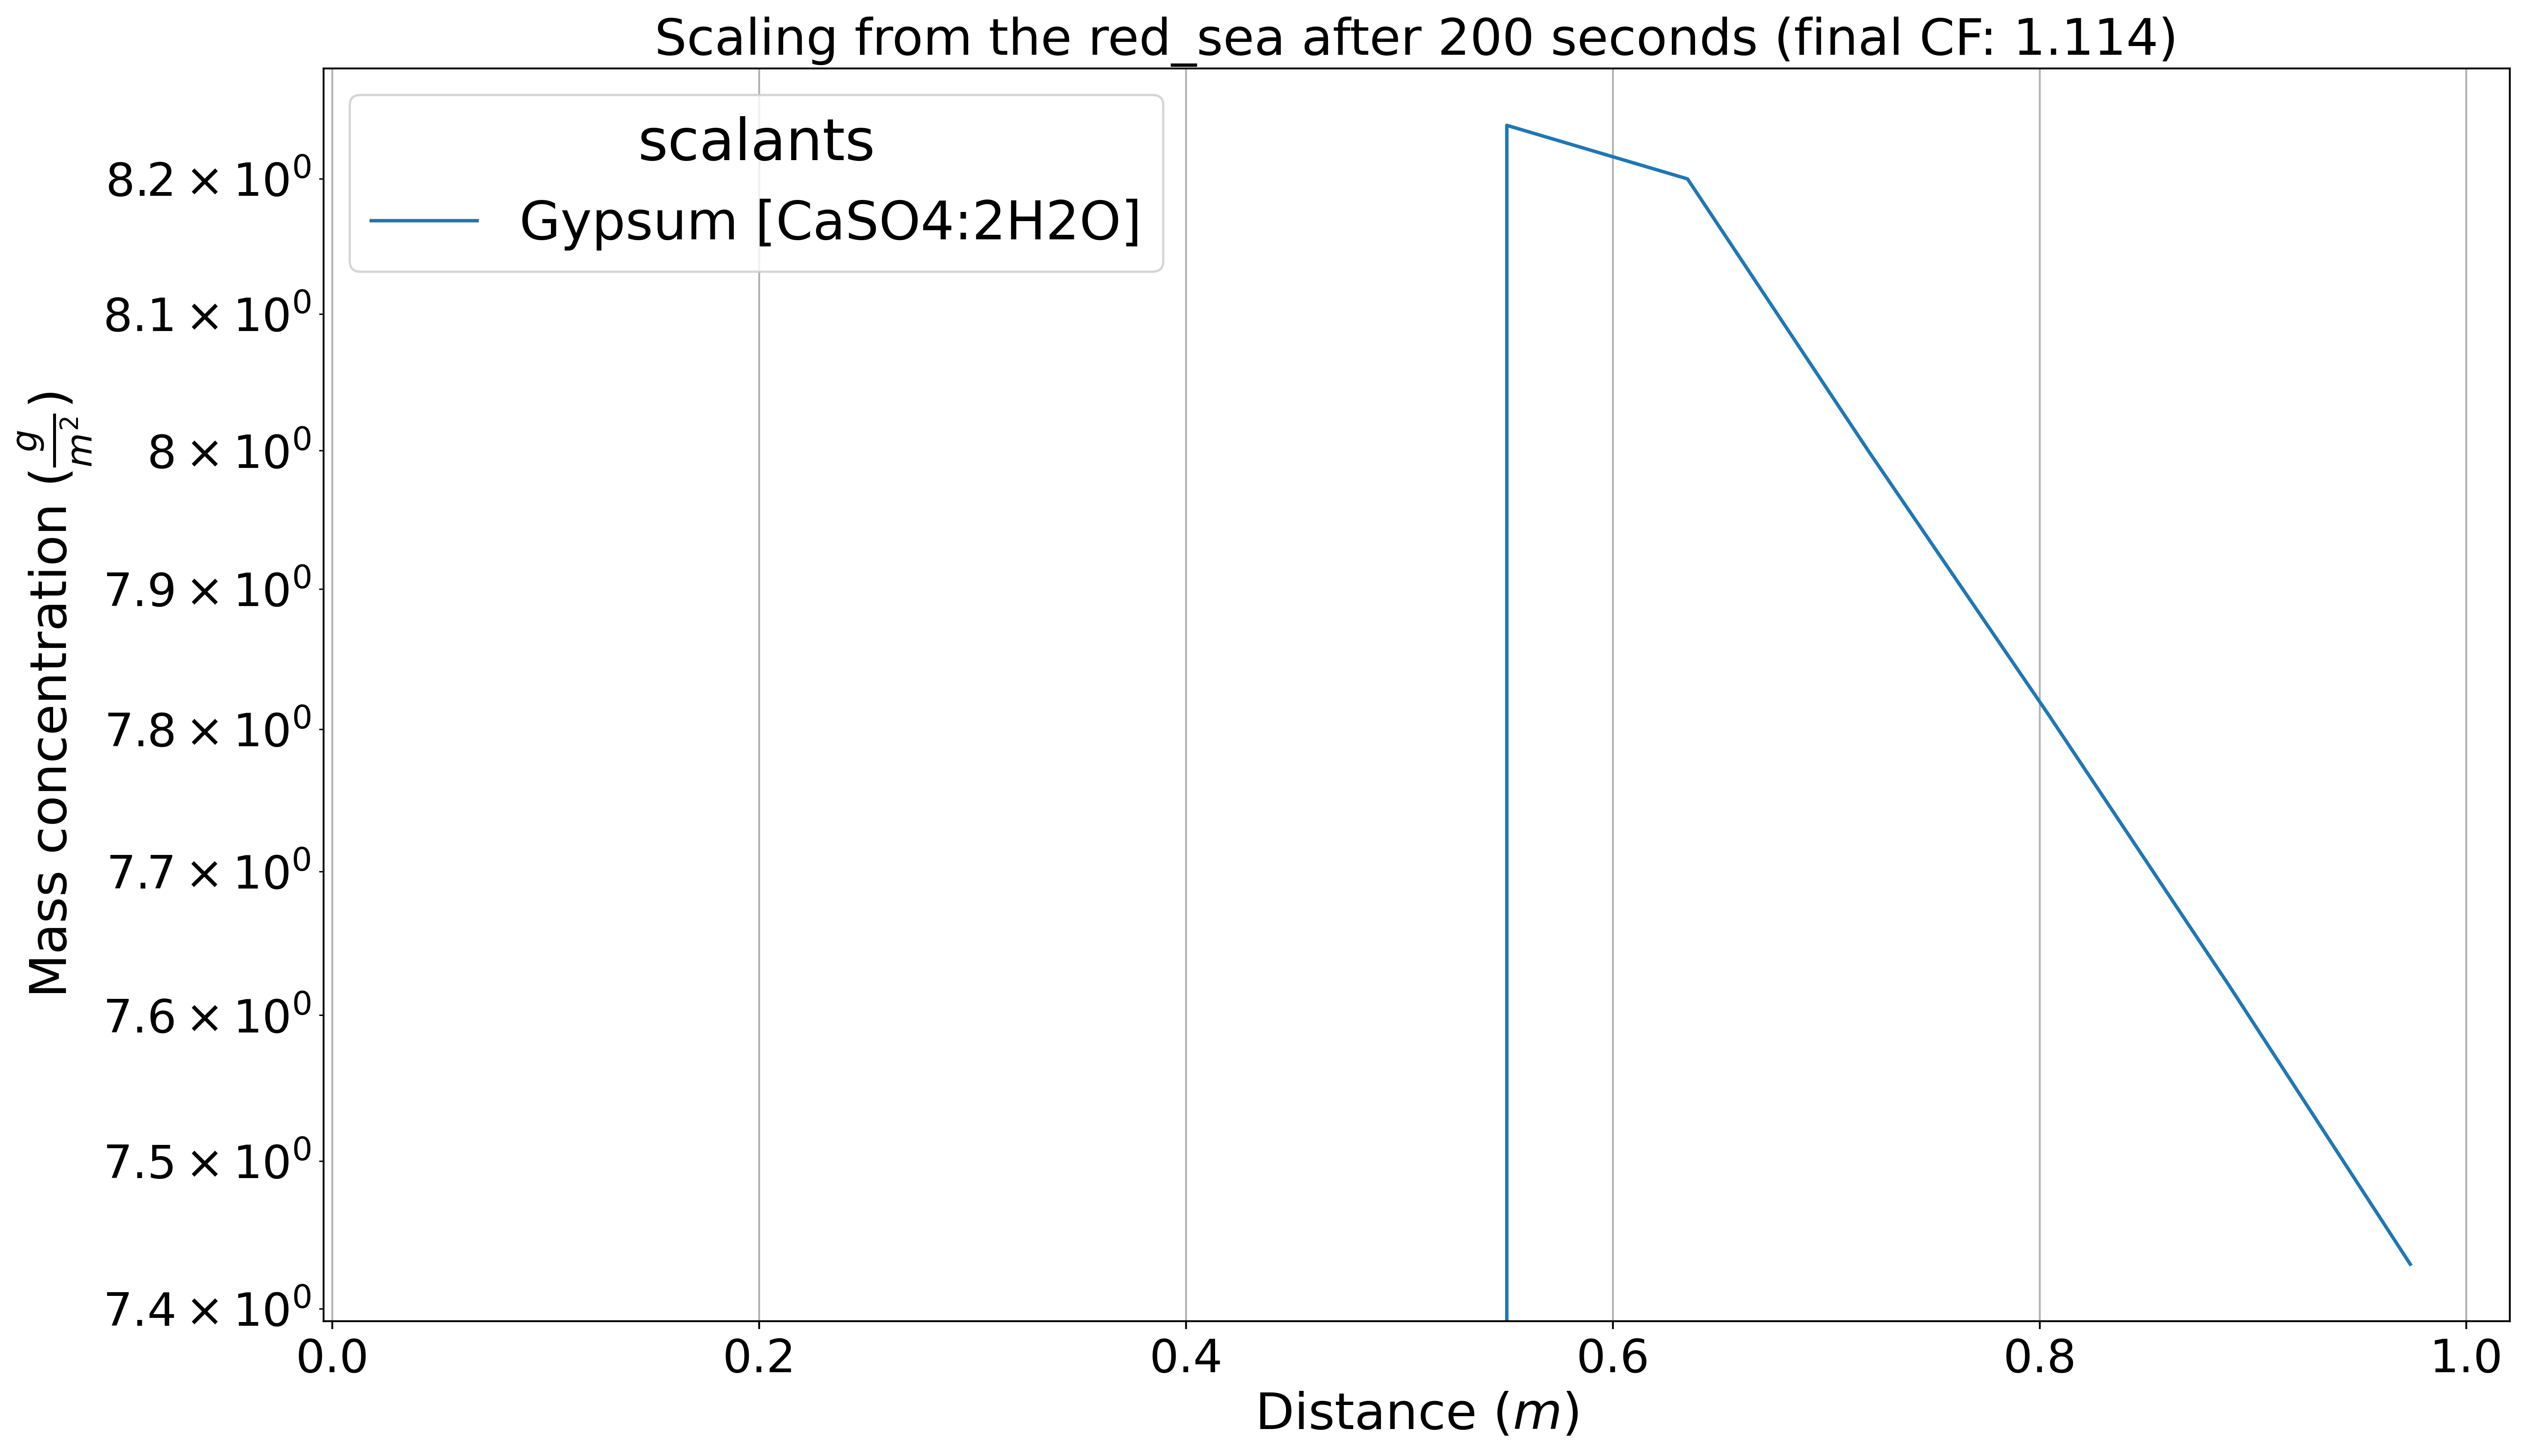

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ionic masses
OrderedDict([('0.0423 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('0.127 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('0.212 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('0.296 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('0.381 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('0.466 (m)',
              {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}}),
             ('0.55 (m)',
              {'ion (g/m^2)': {'Ca': 2.1422648295997537,
                               'H': 0.10775360109520313,
                               'O': 4.276030729414928,
                               'S': 1.7139508398901164}}),
             ('0.635 (m)',
              {'ion (g/m^2)': {'Ca': 2.131865485766745,
                               'H': 0

In [2]:
%run ../../../../rosspy/ro.py

# initial parameters
database_selection = 'pitzer'
simulation_title = 'test'
water_selection = 'red_sea'
simulation_perspective = 'all_distance'
simulation_type = 'transport'
simulation_time = 200
export_name = 'desalination'

# create the input file
ross = ROSSPkg(database_selection, simulation_type = simulation_type, export_content = True, jupyter = True)
ross.reactive_transport(simulation_time, simulation_perspective)
ross.feed_geochemistry(water_selection)
ross.execute(export_name, export_format="eps", log_scale=False)

desalination_data = ross.processed_data

# Comparing the scaling predictions

In [3]:
import pandas
import re

# define the parameters of the system
active_sqr_meters_per_cell = 37/12
pore_volumes = 51/12

# convert the desalination data to grams
refined_desalination_data = pandas.DataFrame()
total_scale = 0
for column in desalination_data:
    for index, row in desalination_data.iterrows():
        refined_desalination_data.at[index, column] = float(row[column]) * active_sqr_meters_per_cell/pore_volumes
        total_scale += refined_desalination_data.at[index, column]
refined_desalination_data.rename(columns = {column: re.sub('(g/m\^2)', 'g',column)}, inplace = True)
refined_desalination_data.index.name = 'Distance (m)'

# sum the evaporation scaling
total_evaporation_scaling = 0
for column in evaporation_data:
    for index, row in evaporation_data.iterrows():
        total_evaporation_scaling += float(evaporation_data.at[index, column])
        
# contrast the desalination and evaporation data
print('refined_desalination_data\n', total_scale, 'total g scale')
display(refined_desalination_data)
print('\n\nevaporation_data\n', total_evaporation_scaling, 'total g scale')
display(evaporation_data)

refined_desalination_data
 34.3156862745098 total g scale


<>:15: DeprecationWarning: invalid escape sequence \^
<>:15: DeprecationWarning: invalid escape sequence \^
C:\Users\Andrew Freiburger\AppData\Local\Temp\ipykernel_74564\2145187044.py:15: DeprecationWarning: invalid escape sequence \^
  refined_desalination_data.rename(columns = {column: re.sub('(g/m\^2)', 'g',column)}, inplace = True)


,Gypsum (g)
Distance (m),
0.0423,0.000000
0.1270,0.000000
0.2120,0.000000
0.2960,0.000000
0.3810,0.000000
0.4660,0.000000
0.5500,5.978039
0.6350,5.949020
0.7200,5.803922




evaporation_data
 10.467664866840927 total g scale


,Gypsum (g)
Concentration Factor (CF),
1.00707,0.000000
1.01424,0.000000
1.02151,0.000000
1.02889,0.000000
1.03638,0.000000
1.04398,0.000000
1.05168,0.000000
1.05951,0.102142
1.06745,0.445836
